In [43]:
import sys
sys.path.append('/root/darknet')
import darknet as dn
import cv2 as cv
import os
from matplotlib import pyplot as plt

In [ ]:
network, class_names, class_colors = dn.load_network("/root/ML-final-assignment/yolov4/monitor.cfg",
                              "/root/ML-final-assignment/yolov4/monitor.data",
                              "/root/ML-final-assignment/yolov4/monitor.weights")
network_width = dn.network_width(network)
network_height = dn.network_height(network)

In [20]:
def image_detector(img, n_width, n_height):
    '''
    使用yolo辨識圖片
    '''
    #建立一張Darknet的空白圖片
    darknet_image = dn.make_image(n_width, n_height, 3)
    #將原始圖片轉為RGB格式
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    #依據網路的規格調整圖片尺寸 resize(被修改影像, (w, h), interpolation=cv.INTER_LINEAR(插值方式))
    img_resized = cv.resize(img_rgb, (n_width, n_height), interpolation=cv.INTER_LINEAR) 
    # 取得圖片的長寬，讓畫框時比例正常
    img_height, img_width, _ = img.shape
    height_ratio = img_height / n_height
    width_ratio = img_width / n_width
    #將調整過大小的影像插入Darknet空白圖片
    dn.copy_image_from_bytes(darknet_image, img_resized.tobytes())
    #辨識圖片
    detections = dn.detect_image(network, class_names, darknet_image)
    #清除圖片
    dn.free_image(darknet_image)
    return detections, width_ratio, height_ratio

def crop_picture(image, bbox):
    '''
    裁切圖片
    '''
    left, top, right, bottom = dn.bbox2points(bbox)
    left, top, right, bottom = int(left * width_ratio), int(
        top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
    image = image[top:bottom, left:right]
    return image

In [51]:
dir = '/root/ML-final-assignment/yolov4/stove_switch/'
fileList =[f for f in os.listdir(dir) if f.endswith('.jpg')]

fileNum = 0

for fileName in fileList:
    image = cv.imread(dir + fileName)
    detections, width_ratio, height_ratio = image_detector(image, network_width, network_height)
    for label, confidence, bbox in detections:
        img = image.copy()
        img = crop_picture(img, bbox)
        fileNum += 1
        print(str(fileNum))
        cv.imwrite("/root/switch_%05d.jpg" % fileNum, img)
    if fileNum > 5:
            break
print(str(fileNum))

1
2
3
4
5
6
7
8
9
10
11
11


In [54]:
for i in range(1,11):
    os.system('clear')
    print(str(i))

1
2
3
4
5
6
7
8
9
10


In [45]:
image = cv.imread("/root/ML-final-assignment/yolov4/stove_switch/GAS_005.jpg")

detections, width_ratio, height_ratio = image_detector(image, network_width, network_height)

In [40]:
for label, confidence, bbox in detections:
    #讀出框四個點的位置
    left, top, right, bottom = dn.bbox2points(bbox)
    #映射到真的圖片大小
    left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
    #畫框框 rectangle(被畫的影像, 左上角座標, 右下角座標, 顏色(class_colors隨機給每個分類一個顏色), 線條寬度)
    cv.rectangle(image, (left, top), (right, bottom), class_colors[label], 2)
    #取得文字尺寸
    (textWidth, textHeight), _ = cv.getTextSize("{} - {:.2f}%".format(label, float(confidence)), cv.FONT_HERSHEY_SIMPLEX, 0.5 ,2)
    #畫文字背景矩形
    cv.rectangle(image, (left -1 , top - 23), (left + textWidth + 1 , top), class_colors[label], -1)
    #依據顏色灰階決定文字顏色
    if (class_colors[label][0] * 0.299 + class_colors[label][1] * 0.587 + class_colors[label][2] * 0.114) > 128:
        textColor = (0, 0, 0)
    else:
        textColor = (255, 255, 255)
    #寫字 putText(被畫的影像, 文字內容,
    #             座標(左上角往上5點), 字型, 文字大小,
    #             顏色, 線條寬度)
    cv.putText(image, "{} - {:.2f}%".format(label, float(confidence)),
            (left, top - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5,
            textColor, 2)

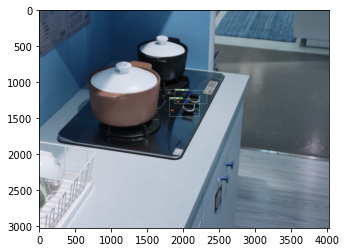

In [41]:
plt.imshow(image)
plt.show()